In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: HST
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


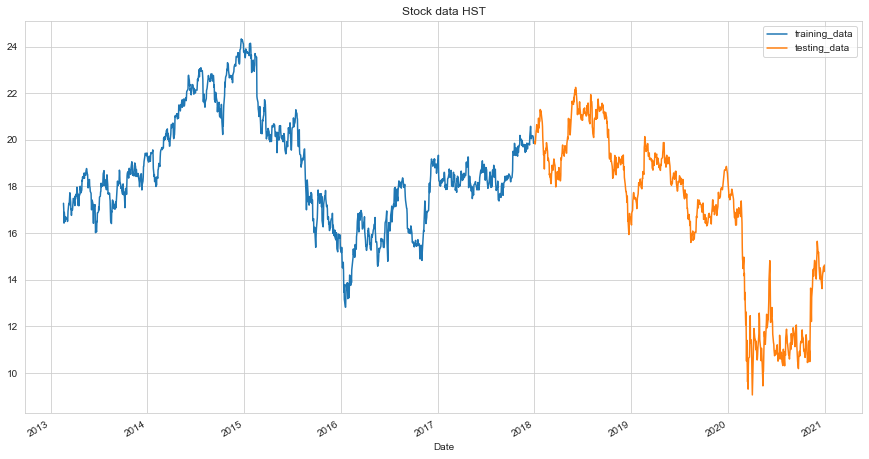

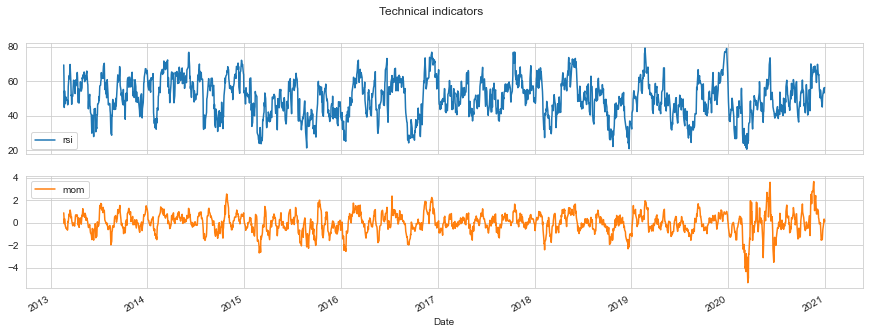

In [2]:
stock_name = 'hst'.upper()
industry = 'Real estate'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1213.27, duration: 0:00:00.195467
episode: 2/2000, episode end value: 1142.92, duration: 0:00:00.177457
episode: 3/2000, episode end value: 1159.77, duration: 0:00:00.188782
episode: 4/2000, episode end value: 1146.12, duration: 0:00:00.221195
episode: 5/2000, episode end value: 1142.85, duration: 0:00:00.216574
episode: 6/2000, episode end value: 1149.78, duration: 0:00:00.216856
episode: 7/2000, episode end value: 1154.98, duration: 0:00:00.239729
episode: 8/2000, episode end value: 1142.42, duration: 0:00:00.222040
episode: 9/2000, episode end value: 1143.18, duration: 0:00:00.213048
episode: 10/2000, episode end value: 1162.29, duration: 0:00:00.203046
episode: 11/2000, episode end value: 1146.28, duration: 0:00:00.233054
episode: 12/2000, episode end value: 1135.80, duration: 0:00:00.243055
episode: 13/2000, episode end value: 1144.06, duration: 0:00:00.263062
episode: 14/2000, episode end value: 1154.46, duration: 0:00:00.213736
episode: 15/200

episode: 117/2000, episode end value: 1135.64, duration: 0:00:00.249632
episode: 118/2000, episode end value: 1138.44, duration: 0:00:00.244038
episode: 119/2000, episode end value: 1133.05, duration: 0:00:00.248584
episode: 120/2000, episode end value: 1109.39, duration: 0:00:00.231377
episode: 121/2000, episode end value: 1200.57, duration: 0:00:00.266638
episode: 122/2000, episode end value: 1169.61, duration: 0:00:00.288127
episode: 123/2000, episode end value: 1124.27, duration: 0:00:00.259735
episode: 124/2000, episode end value: 1127.45, duration: 0:00:00.256564
episode: 125/2000, episode end value: 1148.81, duration: 0:00:00.249624
episode: 126/2000, episode end value: 1179.66, duration: 0:00:00.244074
episode: 127/2000, episode end value: 1157.76, duration: 0:00:00.265270
episode: 128/2000, episode end value: 1170.68, duration: 0:00:00.281067
episode: 129/2000, episode end value: 1154.04, duration: 0:00:00.285059
episode: 130/2000, episode end value: 1144.80, duration: 0:00:00

episode: 231/2000, episode end value: 1115.37, duration: 0:00:00.284617
episode: 232/2000, episode end value: 1128.59, duration: 0:00:00.343478
episode: 233/2000, episode end value: 1140.75, duration: 0:00:00.290857
episode: 234/2000, episode end value: 1190.92, duration: 0:00:00.273206
episode: 235/2000, episode end value: 1139.21, duration: 0:00:00.293730
episode: 236/2000, episode end value: 1138.54, duration: 0:00:00.268697
episode: 237/2000, episode end value: 1177.82, duration: 0:00:00.305194
episode: 238/2000, episode end value: 1147.42, duration: 0:00:00.294101
episode: 239/2000, episode end value: 1150.21, duration: 0:00:00.284776
episode: 240/2000, episode end value: 1143.95, duration: 0:00:00.277724
episode: 241/2000, episode end value: 1132.25, duration: 0:00:00.268043
episode: 242/2000, episode end value: 1120.52, duration: 0:00:00.293513
episode: 243/2000, episode end value: 1172.05, duration: 0:00:00.275182
episode: 244/2000, episode end value: 1147.81, duration: 0:00:00

episode: 345/2000, episode end value: 1129.79, duration: 0:00:00.366045
episode: 346/2000, episode end value: 1144.27, duration: 0:00:00.342764
episode: 347/2000, episode end value: 1135.93, duration: 0:00:00.358040
episode: 348/2000, episode end value: 1140.46, duration: 0:00:00.370128
episode: 349/2000, episode end value: 1124.31, duration: 0:00:00.343840
episode: 350/2000, episode end value: 1111.51, duration: 0:00:00.337310
episode: 351/2000, episode end value: 1132.37, duration: 0:00:00.303695
episode: 352/2000, episode end value: 1120.16, duration: 0:00:00.271347
episode: 353/2000, episode end value: 1119.30, duration: 0:00:00.394864
episode: 354/2000, episode end value: 1138.46, duration: 0:00:00.358083
episode: 355/2000, episode end value: 1142.66, duration: 0:00:00.361082
episode: 356/2000, episode end value: 1158.61, duration: 0:00:00.355299
episode: 357/2000, episode end value: 1136.71, duration: 0:00:00.390436
episode: 358/2000, episode end value: 1114.53, duration: 0:00:00

episode: 459/2000, episode end value: 1137.79, duration: 0:00:00.389203
episode: 460/2000, episode end value: 1150.18, duration: 0:00:00.433792
episode: 461/2000, episode end value: 1133.70, duration: 0:00:00.383246
episode: 462/2000, episode end value: 1185.11, duration: 0:00:00.365224
episode: 463/2000, episode end value: 1143.09, duration: 0:00:00.454300
episode: 464/2000, episode end value: 1145.17, duration: 0:00:00.459773
episode: 465/2000, episode end value: 1143.79, duration: 0:00:00.357656
episode: 466/2000, episode end value: 1165.67, duration: 0:00:00.360157
episode: 467/2000, episode end value: 1140.43, duration: 0:00:00.328455
episode: 468/2000, episode end value: 1163.55, duration: 0:00:00.424381
episode: 469/2000, episode end value: 1124.75, duration: 0:00:00.402424
episode: 470/2000, episode end value: 1139.72, duration: 0:00:00.427581
episode: 471/2000, episode end value: 1137.46, duration: 0:00:00.464231
episode: 472/2000, episode end value: 1155.49, duration: 0:00:00

episode: 573/2000, episode end value: 1146.78, duration: 0:00:00.463200
episode: 574/2000, episode end value: 1154.49, duration: 0:00:00.444902
episode: 575/2000, episode end value: 1149.69, duration: 0:00:00.419867
episode: 576/2000, episode end value: 1154.03, duration: 0:00:00.401796
episode: 577/2000, episode end value: 1134.02, duration: 0:00:00.411950
episode: 578/2000, episode end value: 1161.35, duration: 0:00:00.417265
episode: 579/2000, episode end value: 1163.33, duration: 0:00:00.436651
episode: 580/2000, episode end value: 1128.84, duration: 0:00:00.388480
episode: 581/2000, episode end value: 1144.44, duration: 0:00:00.424242
episode: 582/2000, episode end value: 1173.93, duration: 0:00:00.420975
episode: 583/2000, episode end value: 1152.73, duration: 0:00:00.403773
episode: 584/2000, episode end value: 1162.81, duration: 0:00:00.378864
episode: 585/2000, episode end value: 1137.53, duration: 0:00:00.457303
episode: 586/2000, episode end value: 1157.90, duration: 0:00:00

episode: 687/2000, episode end value: 1160.69, duration: 0:00:00.405724
episode: 688/2000, episode end value: 1155.20, duration: 0:00:00.447535
episode: 689/2000, episode end value: 1176.93, duration: 0:00:00.396082
episode: 690/2000, episode end value: 1157.46, duration: 0:00:00.441888
episode: 691/2000, episode end value: 1168.58, duration: 0:00:00.392145
episode: 692/2000, episode end value: 1175.96, duration: 0:00:00.382832
episode: 693/2000, episode end value: 1144.96, duration: 0:00:00.414392
episode: 694/2000, episode end value: 1117.85, duration: 0:00:00.407088
episode: 695/2000, episode end value: 1141.78, duration: 0:00:00.364246
episode: 696/2000, episode end value: 1146.53, duration: 0:00:00.389029
episode: 697/2000, episode end value: 1143.71, duration: 0:00:00.390736
episode: 698/2000, episode end value: 1134.70, duration: 0:00:00.439303
episode: 699/2000, episode end value: 1138.29, duration: 0:00:00.472032
episode: 700/2000, episode end value: 1158.76, duration: 0:00:00

episode: 801/2000, episode end value: 1137.51, duration: 0:00:00.456104
episode: 802/2000, episode end value: 1134.16, duration: 0:00:00.425978
episode: 803/2000, episode end value: 1138.46, duration: 0:00:00.466030
episode: 804/2000, episode end value: 1144.43, duration: 0:00:00.440992
episode: 805/2000, episode end value: 1258.46, duration: 0:00:00.373921
episode: 806/2000, episode end value: 1170.13, duration: 0:00:00.441867
episode: 807/2000, episode end value: 1160.42, duration: 0:00:00.404702
episode: 808/2000, episode end value: 1150.04, duration: 0:00:00.468834
episode: 809/2000, episode end value: 1133.16, duration: 0:00:00.477771
episode: 810/2000, episode end value: 1129.86, duration: 0:00:00.411441
episode: 811/2000, episode end value: 1133.04, duration: 0:00:00.376307
episode: 812/2000, episode end value: 1135.42, duration: 0:00:00.468502
episode: 813/2000, episode end value: 1133.53, duration: 0:00:00.403931
episode: 814/2000, episode end value: 1110.83, duration: 0:00:00

episode: 915/2000, episode end value: 1167.02, duration: 0:00:00.345925
episode: 916/2000, episode end value: 1122.56, duration: 0:00:00.369503
episode: 917/2000, episode end value: 1126.91, duration: 0:00:00.430353
episode: 918/2000, episode end value: 1148.07, duration: 0:00:00.383026
episode: 919/2000, episode end value: 1149.06, duration: 0:00:00.418275
episode: 920/2000, episode end value: 1139.09, duration: 0:00:00.397761
episode: 921/2000, episode end value: 1136.10, duration: 0:00:00.435166
episode: 922/2000, episode end value: 1155.38, duration: 0:00:00.381761
episode: 923/2000, episode end value: 1156.00, duration: 0:00:00.448306
episode: 924/2000, episode end value: 1164.30, duration: 0:00:00.390224
episode: 925/2000, episode end value: 1137.66, duration: 0:00:00.413236
episode: 926/2000, episode end value: 1159.31, duration: 0:00:00.377778
episode: 927/2000, episode end value: 1127.35, duration: 0:00:00.429991
episode: 928/2000, episode end value: 1154.22, duration: 0:00:00

episode: 1029/2000, episode end value: 1141.54, duration: 0:00:00.381556
episode: 1030/2000, episode end value: 1113.51, duration: 0:00:00.448947
episode: 1031/2000, episode end value: 1191.05, duration: 0:00:00.509486
episode: 1032/2000, episode end value: 1156.05, duration: 0:00:00.448243
episode: 1033/2000, episode end value: 1147.07, duration: 0:00:00.387034
episode: 1034/2000, episode end value: 1154.74, duration: 0:00:00.483054
episode: 1035/2000, episode end value: 1122.98, duration: 0:00:00.360425
episode: 1036/2000, episode end value: 1150.70, duration: 0:00:00.389313
episode: 1037/2000, episode end value: 1180.14, duration: 0:00:00.406442
episode: 1038/2000, episode end value: 1137.46, duration: 0:00:00.474076
episode: 1039/2000, episode end value: 1156.03, duration: 0:00:00.458293
episode: 1040/2000, episode end value: 1162.96, duration: 0:00:00.427734
episode: 1041/2000, episode end value: 1134.64, duration: 0:00:00.362485
episode: 1042/2000, episode end value: 1140.68, dur

episode: 1142/2000, episode end value: 1139.95, duration: 0:00:00.436447
episode: 1143/2000, episode end value: 1130.51, duration: 0:00:00.465334
episode: 1144/2000, episode end value: 1155.10, duration: 0:00:00.458814
episode: 1145/2000, episode end value: 1197.52, duration: 0:00:00.381639
episode: 1146/2000, episode end value: 1140.83, duration: 0:00:00.411184
episode: 1147/2000, episode end value: 1172.98, duration: 0:00:00.467992
episode: 1148/2000, episode end value: 1167.03, duration: 0:00:00.397082
episode: 1149/2000, episode end value: 1179.99, duration: 0:00:00.364079
episode: 1150/2000, episode end value: 1182.95, duration: 0:00:00.469325
episode: 1151/2000, episode end value: 1168.47, duration: 0:00:00.423247
episode: 1152/2000, episode end value: 1141.01, duration: 0:00:00.424629
episode: 1153/2000, episode end value: 1166.18, duration: 0:00:00.384523
episode: 1154/2000, episode end value: 1154.74, duration: 0:00:00.416447
episode: 1155/2000, episode end value: 1138.35, dur

episode: 1255/2000, episode end value: 1141.07, duration: 0:00:00.379479
episode: 1256/2000, episode end value: 1127.79, duration: 0:00:00.435963
episode: 1257/2000, episode end value: 1138.60, duration: 0:00:00.452027
episode: 1258/2000, episode end value: 1143.57, duration: 0:00:00.371758
episode: 1259/2000, episode end value: 1159.98, duration: 0:00:00.466054
episode: 1260/2000, episode end value: 1195.13, duration: 0:00:00.344699
episode: 1261/2000, episode end value: 1154.96, duration: 0:00:00.400746
episode: 1262/2000, episode end value: 1160.86, duration: 0:00:00.447889
episode: 1263/2000, episode end value: 1130.28, duration: 0:00:00.443947
episode: 1264/2000, episode end value: 1119.77, duration: 0:00:00.435255
episode: 1265/2000, episode end value: 1125.02, duration: 0:00:00.353646
episode: 1266/2000, episode end value: 1133.35, duration: 0:00:00.483128
episode: 1267/2000, episode end value: 1171.41, duration: 0:00:00.438108
episode: 1268/2000, episode end value: 1166.21, dur

episode: 1368/2000, episode end value: 1176.66, duration: 0:00:00.458935
episode: 1369/2000, episode end value: 1167.45, duration: 0:00:00.417606
episode: 1370/2000, episode end value: 1161.81, duration: 0:00:00.397634
episode: 1371/2000, episode end value: 1110.95, duration: 0:00:00.405165
episode: 1372/2000, episode end value: 1161.41, duration: 0:00:00.371393
episode: 1373/2000, episode end value: 1141.51, duration: 0:00:00.425027
episode: 1374/2000, episode end value: 1201.98, duration: 0:00:00.374683
episode: 1375/2000, episode end value: 1149.59, duration: 0:00:00.446469
episode: 1376/2000, episode end value: 1140.41, duration: 0:00:00.380681
episode: 1377/2000, episode end value: 1145.09, duration: 0:00:00.390691
episode: 1378/2000, episode end value: 1205.01, duration: 0:00:00.440152
episode: 1379/2000, episode end value: 1262.08, duration: 0:00:00.399110
episode: 1380/2000, episode end value: 1150.34, duration: 0:00:00.387462
episode: 1381/2000, episode end value: 1173.67, dur

episode: 1481/2000, episode end value: 1170.73, duration: 0:00:00.372993
episode: 1482/2000, episode end value: 1186.75, duration: 0:00:00.467401
episode: 1483/2000, episode end value: 1140.63, duration: 0:00:00.395733
episode: 1484/2000, episode end value: 1127.04, duration: 0:00:00.484548
episode: 1485/2000, episode end value: 1117.15, duration: 0:00:00.467723
episode: 1486/2000, episode end value: 1152.30, duration: 0:00:00.421933
episode: 1487/2000, episode end value: 1170.01, duration: 0:00:00.370217
episode: 1488/2000, episode end value: 1178.36, duration: 0:00:00.435457
episode: 1489/2000, episode end value: 1160.98, duration: 0:00:00.365740
episode: 1490/2000, episode end value: 1137.42, duration: 0:00:00.426193
episode: 1491/2000, episode end value: 1181.24, duration: 0:00:00.439397
episode: 1492/2000, episode end value: 1145.83, duration: 0:00:00.413369
episode: 1493/2000, episode end value: 1159.13, duration: 0:00:00.446976
episode: 1494/2000, episode end value: 1187.59, dur

episode: 1594/2000, episode end value: 1136.39, duration: 0:00:00.461438
episode: 1595/2000, episode end value: 1162.97, duration: 0:00:00.398735
episode: 1596/2000, episode end value: 1143.85, duration: 0:00:00.492713
episode: 1597/2000, episode end value: 1107.62, duration: 0:00:00.506329
episode: 1598/2000, episode end value: 1117.93, duration: 0:00:00.380930
episode: 1599/2000, episode end value: 1114.64, duration: 0:00:00.377636
episode: 1600/2000, episode end value: 1148.45, duration: 0:00:00.384843
episode: 1601/2000, episode end value: 1131.02, duration: 0:00:00.375943
episode: 1602/2000, episode end value: 1156.44, duration: 0:00:00.434342
episode: 1603/2000, episode end value: 1143.51, duration: 0:00:00.443877
episode: 1604/2000, episode end value: 1113.12, duration: 0:00:00.454196
episode: 1605/2000, episode end value: 1140.00, duration: 0:00:00.419242
episode: 1606/2000, episode end value: 1185.48, duration: 0:00:00.445739
episode: 1607/2000, episode end value: 1117.44, dur

episode: 1707/2000, episode end value: 1166.70, duration: 0:00:00.468088
episode: 1708/2000, episode end value: 1155.20, duration: 0:00:00.470235
episode: 1709/2000, episode end value: 1172.62, duration: 0:00:00.426911
episode: 1710/2000, episode end value: 1137.66, duration: 0:00:00.442270
episode: 1711/2000, episode end value: 1167.63, duration: 0:00:00.440438
episode: 1712/2000, episode end value: 1137.02, duration: 0:00:00.437952
episode: 1713/2000, episode end value: 1125.08, duration: 0:00:00.396574
episode: 1714/2000, episode end value: 1128.73, duration: 0:00:00.379791
episode: 1715/2000, episode end value: 1136.45, duration: 0:00:00.473538
episode: 1716/2000, episode end value: 1146.17, duration: 0:00:00.469054
episode: 1717/2000, episode end value: 1134.22, duration: 0:00:00.406884
episode: 1718/2000, episode end value: 1117.41, duration: 0:00:00.438498
episode: 1719/2000, episode end value: 1135.62, duration: 0:00:00.466762
episode: 1720/2000, episode end value: 1186.23, dur

episode: 1820/2000, episode end value: 1127.44, duration: 0:00:00.390520
episode: 1821/2000, episode end value: 1131.97, duration: 0:00:00.403074
episode: 1822/2000, episode end value: 1149.46, duration: 0:00:00.493581
episode: 1823/2000, episode end value: 1142.87, duration: 0:00:00.393202
episode: 1824/2000, episode end value: 1152.09, duration: 0:00:00.379941
episode: 1825/2000, episode end value: 1146.58, duration: 0:00:00.390832
episode: 1826/2000, episode end value: 1163.26, duration: 0:00:00.340917
episode: 1827/2000, episode end value: 1119.98, duration: 0:00:00.351756
episode: 1828/2000, episode end value: 1155.95, duration: 0:00:00.406016
episode: 1829/2000, episode end value: 1148.33, duration: 0:00:00.338013
episode: 1830/2000, episode end value: 1167.24, duration: 0:00:00.391002
episode: 1831/2000, episode end value: 1168.99, duration: 0:00:00.407842
episode: 1832/2000, episode end value: 1130.02, duration: 0:00:00.360523
episode: 1833/2000, episode end value: 1132.50, dur

episode: 1933/2000, episode end value: 1105.10, duration: 0:00:00.357401
episode: 1934/2000, episode end value: 1134.36, duration: 0:00:00.343062
episode: 1935/2000, episode end value: 1178.14, duration: 0:00:00.311508
episode: 1936/2000, episode end value: 1154.37, duration: 0:00:00.328096
episode: 1937/2000, episode end value: 1155.42, duration: 0:00:00.315309
episode: 1938/2000, episode end value: 1144.61, duration: 0:00:00.328862
episode: 1939/2000, episode end value: 1118.08, duration: 0:00:00.319518
episode: 1940/2000, episode end value: 1134.62, duration: 0:00:00.291913
episode: 1941/2000, episode end value: 1146.68, duration: 0:00:00.275509
episode: 1942/2000, episode end value: 1151.88, duration: 0:00:00.329147
episode: 1943/2000, episode end value: 1105.28, duration: 0:00:00.336497
episode: 1944/2000, episode end value: 1162.91, duration: 0:00:00.323856
episode: 1945/2000, episode end value: 1149.45, duration: 0:00:00.345681
episode: 1946/2000, episode end value: 1129.78, dur

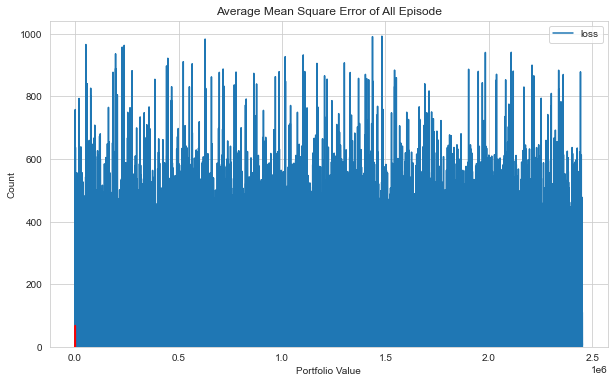

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

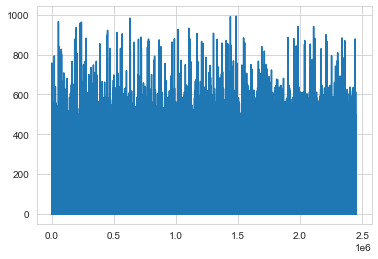

In [5]:
plt.plot(agent.model.losses)

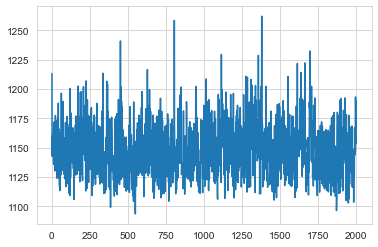

In [6]:
plt.plot(portfolio_value)

episode end value: 971.49, duration: 0:00:00.114568
Sell: 202 times, Buy: 208 times


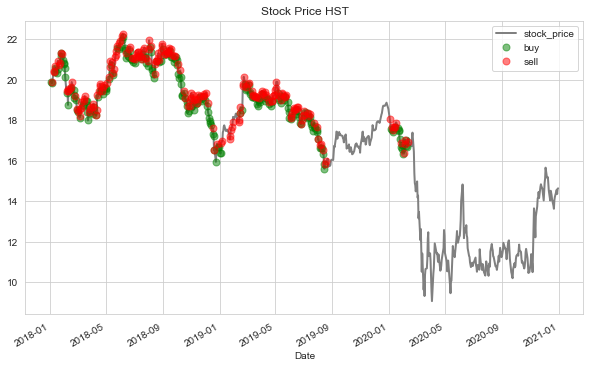

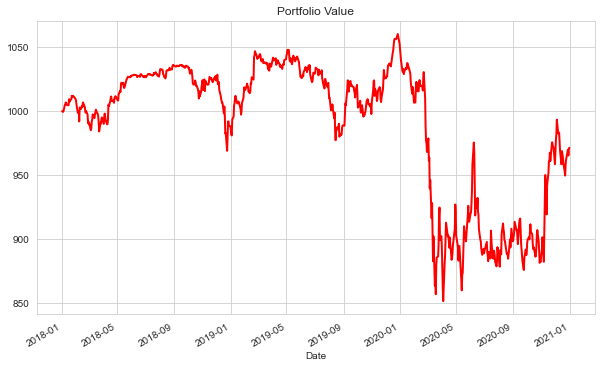

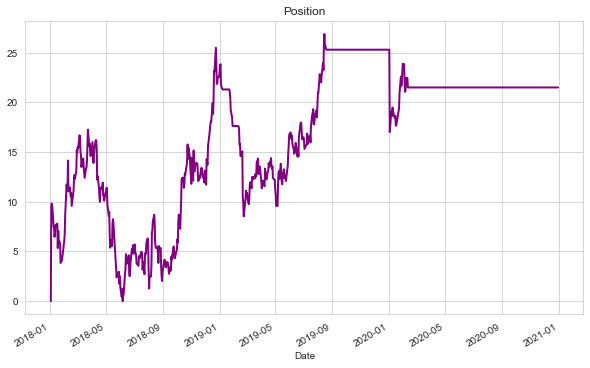

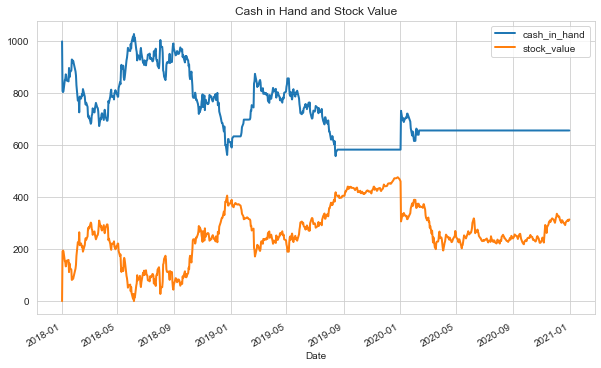

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: HST
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -0.96 %
Volatility: 0.1194
shape ratio: -0.1725
Maximun drawdown: -19.67 %
Calmar ratio: -0.0488
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -9.81 %
Volatility (benchmark): 0.4354
shape ratio: -0.2505
Maximun drawdown: -59.28 %
Calmar ratio (benchmark): -0.1654


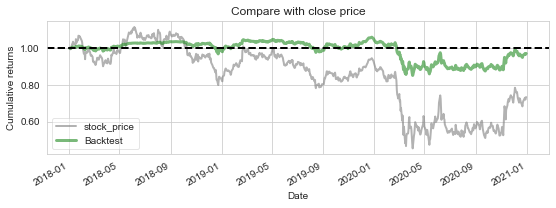

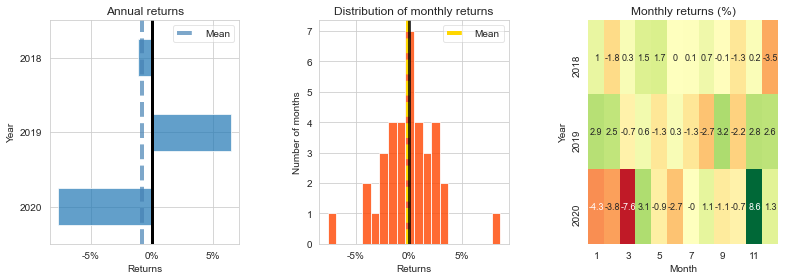

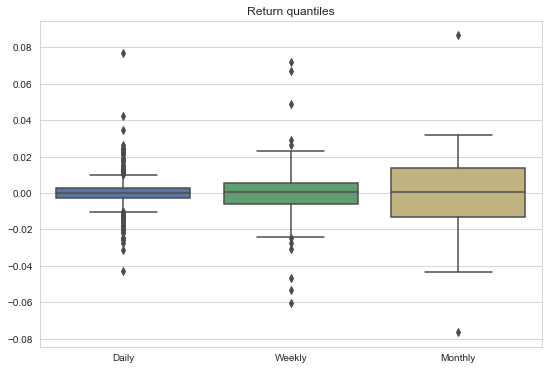

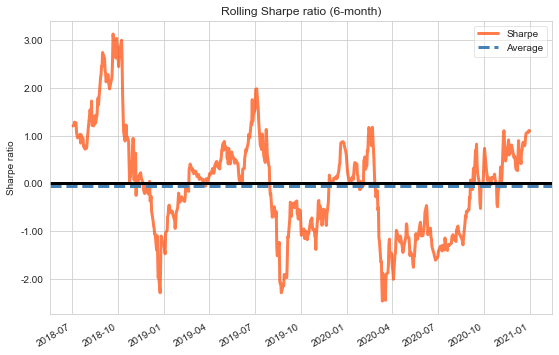

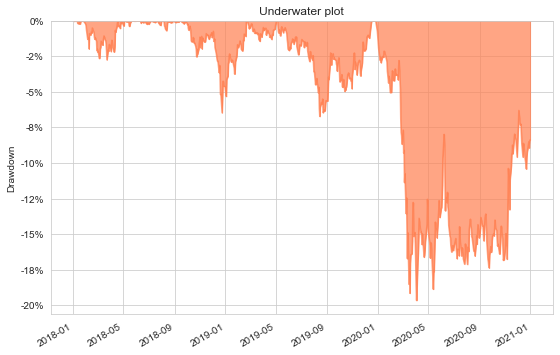

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')